In [ ]:
import pandas as pd

# Load data
sales_data = pd.read_csv('/content/sales_data.csv', encoding='latin1')
promotions_data = pd.read_csv('/content/promoted.csv')
economic_data = pd.read_csv('/content/economics.csv')


In [ ]:
# Fill missing values in sales_data
sales_data.fillna(method='ffill', inplace=True)
sales_data.fillna(method='bfill', inplace=True)

# Fill missing values in promotions_data and economic_data
promotions_data.fillna('None', inplace=True)
economic_data.fillna(method='ffill', inplace=True)


In [ ]:
# print column names
print(sales_data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'],
      dtype='object')


In [ ]:
# print column names
print(promotions_data.columns)

Index(['customer_id', 'resp', 'card_tenure', 'risk_score', 'num_promoted',
       'avg_bal', 'geo_group', 'res_type'],
      dtype='object')


In [ ]:
# print column names
print(economic_data.columns)

Index(['date', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy'], dtype='object')


In [ ]:
# Display the first few rows to inspect the 'date' column
print(sales_data.head())
print(promotions_data.head())
print(economic_data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...             PHONE  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...        2125557818   
1    5/7/2003 0:00  Shipped       2         5     2003  ...        26.47.1555   
2    7/1/2003 0:00  Shipped       3         7     2003  ...  +33 1 46 62 7555   
3   8/25/2003 0:00  Shipped       3         8     2003  ...        6265557265   
4  10/10/2003 0:00  Shipped       4        10     2003  ...        6505551386   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  \

In [ ]:
sales_data.columns = sales_data.columns.str.strip()
promotions_data.columns = promotions_data.columns.str.strip()
economic_data.columns = economic_data.columns.str.strip()


In [ ]:
print("Sales Data Columns:", sales_data.columns)
print("Promotions Data Columns:", promotions_data.columns)
print("Economic Data Columns:", economic_data.columns)


Sales Data Columns: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'],
      dtype='object')
Promotions Data Columns: Index(['customer_id', 'resp', 'card_tenure', 'risk_score', 'num_promoted',
       'avg_bal', 'geo_group', 'res_type'],
      dtype='object')
Economic Data Columns: Index(['date', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy'], dtype='object')


In [ ]:
# Rename columns if needed
sales_data.rename(columns={'ORDERDATE': 'date'}, inplace=True)
promotions_data.rename(columns={'card_tenure': 'date'}, inplace=True)
economic_data.rename(columns={'DATE': 'date'}, inplace=True)

In [ ]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
economic_data['date'] = pd.to_datetime(economic_data['date'])


In [ ]:
# Convert 'date' columns to datetime in all DataFrames
if 'date' in sales_data.columns:
    sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')
if 'date' in promotions_data.columns:
    promotions_data['date'] = pd.to_datetime(promotions_data['date'], errors='coerce')
if 'date' in economic_data.columns:
    economic_data['date'] = pd.to_datetime(economic_data['date'], errors='coerce')


In [ ]:
# Merge sales_data and promotions_data if both have 'date' column
if 'date' in sales_data.columns and 'date' in promotions_data.columns:
    data = pd.merge(sales_data, promotions_data, on='date', how='outer')
else:
    data = sales_data if 'date' in sales_data.columns else promotions_data

# Merge the resulting DataFrame with economic_data if it has 'date' column
if 'date' in economic_data.columns:
    data = pd.merge(data, economic_data, on='date', how='outer')

# Print columns to verify
print("Merged Data Columns:", data.columns)


Merged Data Columns: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'customer_id', 'resp', 'risk_score', 'num_promoted', 'avg_bal',
       'geo_group', 'res_type', 'pce', 'pop', 'psavert', 'uempmed',
       'unemploy'],
      dtype='object')


In [ ]:
# Check if 'sales' column is correctly named
if 'sales' not in data.columns:
    # If there is another column that should be 'sales', rename it
    for col in data.columns:
        if 'sale' in col.lower():
            data.rename(columns={col: 'sales'}, inplace=True)
            break

# Verify 'sales' column exists
if 'sales' not in data.columns:
    raise ValueError("'sales' column not found in the data.")


In [ ]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract time-based features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week
data['day_of_week'] = data['date'].dt.dayofweek

# Lag features for sales
data['sales_last_week'] = data['sales'].shift(7)
data['sales_last_month'] = data['sales'].shift(30)
data['sales_last_year'] = data['sales'].shift(365)

# Rolling window statistics
data['rolling_mean_7'] = data['sales'].rolling(window=7).mean()
data['rolling_mean_30'] = data['sales'].rolling(window=30).mean()

# Display the resulting DataFrame
print(data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    sales  \
0      10107.0             30.0      95.70              2.0  2871.00   
1      10107.0             39.0      99.91              5.0  3896.49   
2      10107.0             27.0     100.00              4.0  6065.55   
3      10107.0             21.0     100.00              1.0  3036.60   
4      10107.0             29.0      70.87              6.0  2055.23   

        date   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... unemploy    year month  \
0 2003-02-24  Shipped     1.0       2.0   2003.0  ...      NaN  2003.0   2.0   
1 2003-02-24  Shipped     1.0       2.0   2003.0  ...      NaN  2003.0   2.0   
2 2003-02-24  Shipped     1.0       2.0   2003.0  ...      NaN  2003.0   2.0   
3 2003-02-24  Shipped     1.0       2.0   2003.0  ...      NaN  2003.0   2.0   
4 2003-02-24  Shipped     1.0       2.0   2003.0  ...      NaN  2003.0   2.0   

  week day_of_week sales_last_week sales_last_month sales_last_year  \
0    9         

In [ ]:
print(data.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'sales', 'date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'customer_id', 'resp', 'risk_score', 'num_promoted', 'avg_bal',
       'geo_group', 'res_type', 'pce', 'pop', 'psavert', 'uempmed', 'unemploy',
       'year', 'month', 'week', 'day_of_week', 'sales_last_week',
       'sales_last_month', 'sales_last_year', 'rolling_mean_7',
       'rolling_mean_30'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
numerical_features = ['sales_last_week', 'sales_last_month', 'sales_last_year', 'rolling_mean_7', 'rolling_mean_30', 'uempmed']
categorical_features = ['num_promoted', 'month', 'day_of_week']

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Prepare data
X = data.drop(['date', 'sales'], axis=1)
y = data['sales']

# Impute missing values in the target variable 'y'
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and flatten

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and linear regression
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())])

# Train the model
linear_regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_last_week',
                                                   'sales_last_month',
                                                   'sales_last_year',
                                                   'rolling_mean_7',
                                                   'rolling_mean_30',
                                                   'uempmed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['num_promoted', 'month',
                                                   'day_of_week'])])),
                ('imputer', SimpleImputer()),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

# Prepare data
X = data.drop(['date', 'sales'], axis=1)
y = data['sales']

# Impute missing values in the target variable 'y'
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and flatten

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and decision tree regression
decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', DecisionTreeRegressor(random_state=42))])

# Train the model
decision_tree_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_last_week',
                                                   'sales_last_month',
                                                   'sales_last_year',
                                                   'rolling_mean_7',
                                                   'rolling_mean_30',
                                                   'uempmed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['num_promoted', 'month',
                                                   'day_of_week'])])),
                ('imputer', SimpleImputer()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [ ]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# Prepare data
X = data.drop(['date', 'sales'], axis=1)
y = data['sales']

# Impute missing values in the target variable 'y'
imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel() # Reshape and flatten

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and XGBoost regression
xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', XGBRegressor(random_state=42))])

# Train the model
xgboost_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sales_last_week',
                                                   'sales_last_month',
                                                   'sales_last_year',
                                                   'rolling_mean_7',
                                                   'rolling_mean_30',
                                                   'uempmed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['num_promoted', 'month',
                                                   'day_of_week'])])),
                ('imputer', S...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['sales']])
X_lstm = []
y_lstm = []

for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split data
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32)


Epoch 1/50
709/709 [==============================] - 47s 57ms/step - loss: nan
Epoch 2/50
709/709 [==============================] - 38s 53ms/step - loss: nan
Epoch 3/50
709/709 [==============================] - 41s 58ms/step - loss: nan
Epoch 4/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 5/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 6/50
709/709 [==============================] - 40s 57ms/step - loss: nan
Epoch 7/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 8/50
709/709 [==============================] - 41s 57ms/step - loss: nan
Epoch 9/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 10/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 11/50
709/709 [==============================] - 39s 55ms/step - loss: nan
Epoch 12/50
709/709 [==============================] - 43s 60ms/step - loss: nan
Epoch 13/50
709/709 [================

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

def evaluate_model(model, X_test, y_test):
    # Handle categorical columns using OneHotEncoder
    categorical_features = X_test.select_dtypes(include=['object']).columns
    numeric_features = X_test.select_dtypes(include=['int64', 'float64']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        # Convert all categorical values to strings before encoding
        ('string_converter', ColumnTransformer(
            transformers=[('str', OneHotEncoder(handle_unknown='ignore', dtype=object), categorical_features)],
            remainder='passthrough'
        )),
        ('encoder', OneHotEncoder(handle_unknown='ignore', dtype=object)),
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
        ]
    )

    X_test_preprocessed = preprocessor.fit_transform(X_test)
    # Predict using the model
    y_pred = model.predict(X_test_preprocessed)
    # Calculate metrics
    y_pred_flat = y_pred.reshape(-1)

    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred_flat, squared=False)
    mae = mean_absolute_error(y_test, y_pred_flat)
    r2 = r2_score(y_test, y_pred_flat)

    return rmse, mae, r2




In [ ]:
print(type(X_test))  # Should print <class 'pandas.core.frame.DataFrame'>
print(type(y_test))  # Should print <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
import pandas as pd

X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [ ]:
# Evaluate linear regression model
rmse_lr, mae_lr, r2_lr = evaluate_model(linear_regression_model, X_test, y_test)
print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, R-squared: {r2_lr}")

Linear Regression - RMSE: 523.6500345489962, MAE: 128.9569237701879, R-squared: 0.11752054246527366


In [ ]:
# Evaluate decision tree model
rmse_dt, mae_dt, r2_dt = evaluate_model(decision_tree_model, X_test, y_test)
print(f"Decision Tree - RMSE: {rmse_dt}, MAE: {mae_dt}, R-squared: {r2_dt}")

Decision Tree - RMSE: 707.5788928677765, MAE: 169.4278438196828, R-squared: -0.6112839101090073


In [ ]:
# Evaluate XGBoost model
rmse_xgb, mae_xgb, r2_xgb = evaluate_model(xgboost_model, X_test, y_test)
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R-squared: {r2_xgb}")


XGBoost - RMSE: 590.8109545163262, MAE: 143.29486159597627, R-squared: -0.12336117496222099


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for decision tree model
param_grid = {
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


Column 'STATUS' has mixed types: [<class 'float'> <class 'str'>]
Column 'PRODUCTLINE' has mixed types: [<class 'float'> <class 'str'>]
Column 'PRODUCTCODE' has mixed types: [<class 'float'> <class 'str'>]
Column 'CUSTOMERNAME' has mixed types: [<class 'float'> <class 'str'>]
Column 'PHONE' has mixed types: [<class 'float'> <class 'str'>]
Column 'ADDRESSLINE1' has mixed types: [<class 'float'> <class 'str'>]
Column 'ADDRESSLINE2' has mixed types: [<class 'float'> <class 'str'>]
Column 'CITY' has mixed types: [<class 'float'> <class 'str'>]
Column 'STATE' has mixed types: [<class 'float'> <class 'str'>]
Column 'POSTALCODE' has mixed types: [<class 'float'> <class 'str'>]
Column 'COUNTRY' has mixed types: [<class 'float'> <class 'str'>]
Column 'TERRITORY' has mixed types: [<class 'float'> <class 'str'>]
Column 'CONTACTLASTNAME' has mixed types: [<class 'float'> <class 'str'>]
Column 'CONTACTFIRSTNAME' has mixed types: [<class 'float'> <class 'str'>]
Column 'customer_id' has mixed types: [

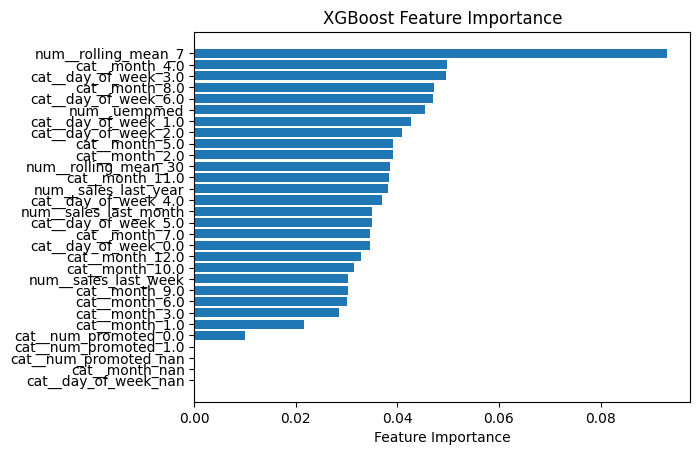

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Identify columns with mixed types in X_train
for col in X_train.columns:
    if X_train[col].apply(type).nunique() > 1:
        print(f"Column '{col}' has mixed types: {X_train[col].apply(type).unique()}")

# Convert mixed type columns to a consistent type (choose either string or numeric based on your data)
# Example: Convert all values to strings
for col in X_train.columns:
    if X_train[col].apply(type).nunique() > 1:
        if X_train[col].dtype == 'UInt32':
            X_train[col] = X_train[col].fillna(0).astype(int)  # Fill NaN with 0 and convert to integer
        else:
            X_train[col] = X_train[col].fillna('').astype(str)  # For other mixed types, convert to string

# Now try fitting the preprocessor again
X_transformed = preprocessor.fit_transform(X_train)

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Feature importance for XGBoost
feature_names_list = preprocessor.get_feature_names_out().tolist()  # Convert to list
xgboost_model.named_steps['regressor'].get_booster().feature_names = feature_names_list
feature_importances = xgboost_model.named_steps['regressor'].feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(preprocessor.get_feature_names_out())[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
# Example: Exporting models
import joblib

joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(xgboost_model, 'xgboost_model.pkl')
lstm_model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load models
linear_regression_model = joblib.load('linear_regression_model.pkl')
decision_tree_model = joblib.load('decision_tree_model.pkl')
xgboost_model = joblib.load('xgboost_model.pkl')
lstm_model = load_model('lstm_model.h5')

# Initialize Flask app
app = Flask(__name__)

# Define prediction route
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    model_type = data.get('model_type')
    features = np.array(data.get('features')).reshape(1, -1)

    if model_type == 'linear_regression':
        prediction = linear_regression_model.predict(features)
    elif model_type == 'decision_tree':
        prediction = decision_tree_model.predict(features)
    elif model_type == 'xgboost':
        prediction = xgboost_model.predict(features)
    elif model_type == 'lstm':
        features = features.reshape(1, features.shape[1], 1)
        prediction = lstm_model.predict(features)
    else:
        return jsonify({'error': 'Invalid model type'})

    return jsonify({'prediction': prediction.tolist()})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Performance tracking
def evaluate_model_performance(model, X_val, y_val):
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    log_performance(rmse, mae, r2)  # Custom function to log performance

# Data drift detection
def detect_data_drift(current_data, historical_data):
    current_distribution = current_data.describe()
    historical_distribution = historical_data.describe()
    drift = compare_distributions(current_distribution, historical_distribution)  # Custom function to compare distributions
    if drift:
        alert_data_drift()  # Custom function to alert on data drift


In [ ]:
# Scenario: Forecasting sales for a new product launch
new_product_features = [...]  # Features for the new product
new_product_features_reshaped = np.array(new_product_features).reshape(1, -1)
predicted_sales = xgboost_model.predict(new_product_features_reshaped)
print(f"Predicted sales for the new product: {predicted_sales}")

# Scenario: Analyzing the impact of a new promotion
promotion_features = [...]  # Features including new promotion details
predicted_sales = linear_regression_model.predict(promotion_features)
print(f"Predicted sales with the new promotion: {predicted_sales}")
